# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input,Flatten,Dense,Conv2D,ReLU,BatchNormalization,MaxPool2D
from keras.optimizers import Adam
from keras.regularizers import l2
%matplotlib inline

# Preprocessing Data

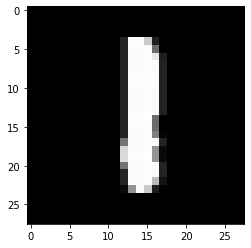

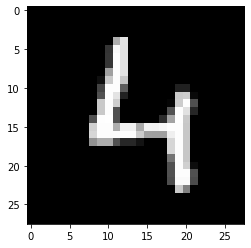

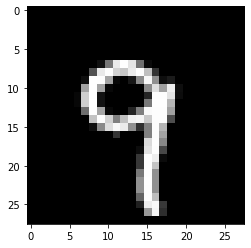

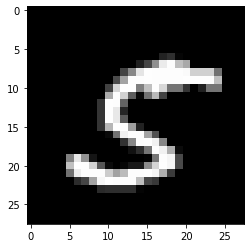

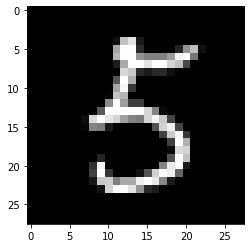

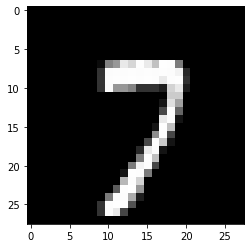

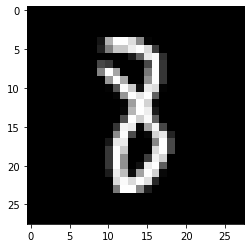

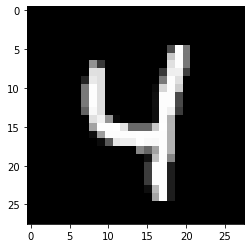

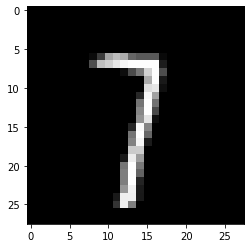

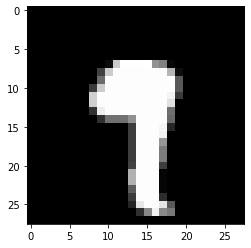

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)  
pd.set_option('max_rows', None)
data = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')
Y = data['label'].to_numpy()
data = data.drop(columns=['label'])
X = data.to_numpy()
test = test.to_numpy()
X = X.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)
X = X/255.0
test = test/255.0
indices = np.random.randint(low=0, high=42000, size=10)
for i in indices:
    plt.figure()
    plt.imshow(X[i,:,:,0], cmap='gray')
Y = to_categorical(Y, 10)

# Splitting the data into Training Set and Testing Set

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)

In [4]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(32,(5,5), activation = 'relu', input_shape = (28,28,1)),
     tf.keras.layers.Conv2D(32,(5,5), activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
     tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.25),    
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dense(10 , activation = 'softmax')
])

# Model Summary

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 64)          0

# Model Compilation

In [6]:
# Define the optimizer
optimizer = RMSprop(lr=0.001,  epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Creating Callbacks

In [7]:
from keras.callbacks import ModelCheckpoint   
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, verbose=1,
                              patience=3, min_lr=0.00001)

# Training The Model

In [8]:
history = model.fit(X_train,Y_train,epochs=5 , validation_data=(X_test,Y_test), batch_size=32)

Epoch 1/5
1247/1247 [==============================] - 6s 5ms/step - loss: 0.1924 - accuracy: 0.9389 - val_loss: 0.0536 - val_accuracy: 0.9819
Epoch 2/5
1247/1247 [==============================] - 5s 4ms/step - loss: 0.0673 - accuracy: 0.9797 - val_loss: 0.0440 - val_accuracy: 0.9871
Epoch 3/5
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0546 - accuracy: 0.9842 - val_loss: 0.0448 - val_accuracy: 0.9876
Epoch 4/5
1247/1247 [==============================] - 5s 4ms/step - loss: 0.0518 - accuracy: 0.9857 - val_loss: 0.0596 - val_accuracy: 0.9886
Epoch 5/5
1247/1247 [==============================] - 5s 4ms/step - loss: 0.0532 - accuracy: 0.9861 - val_loss: 0.0323 - val_accuracy: 0.9914


# Plotting Loss of the traning model

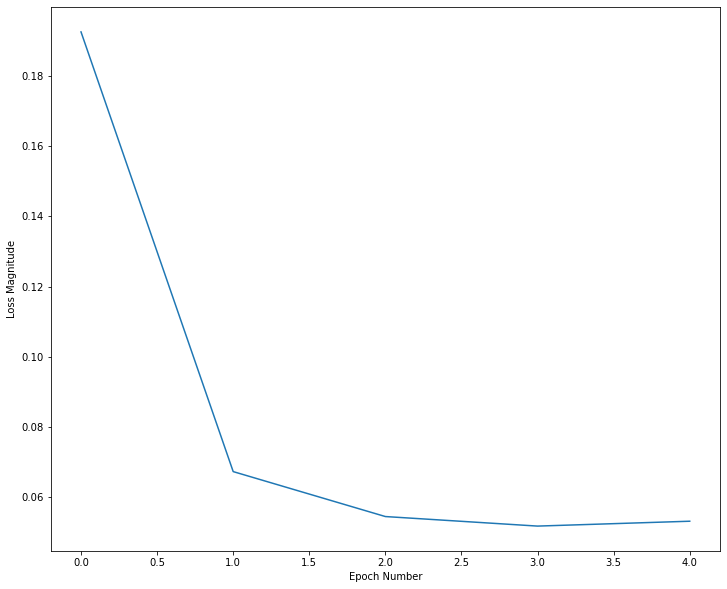

In [9]:
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

# Plotting Accuracy of the traning model

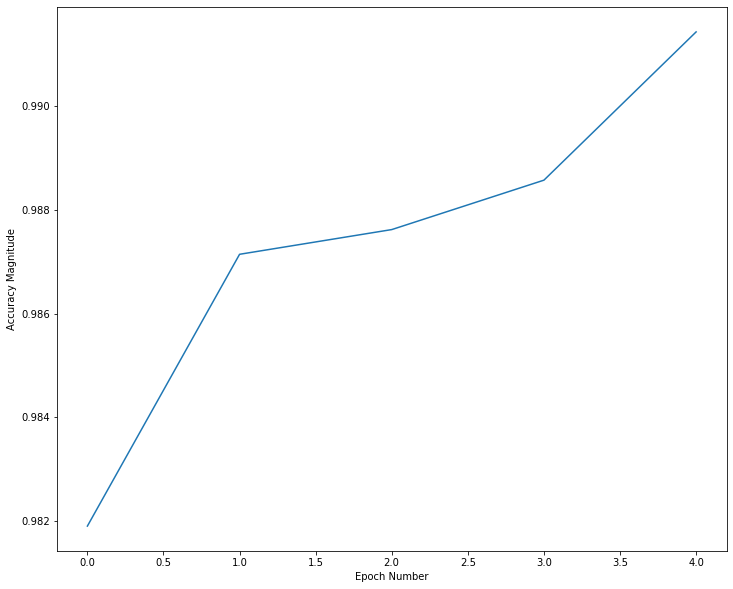

In [10]:
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy Magnitude")
plt.plot(history.history['val_accuracy'])
plt.show()